In [6]:
import numpy as np
X = 2*np.random.rand(100,1)
y = 4+3*X + np.random.randn(100,1)

In [7]:
X

array([[1.94264074],
       [1.4419112 ],
       [0.62799301],
       [0.33535868],
       [0.78402717],
       [0.91114256],
       [1.01554586],
       [0.51353483],
       [0.40183917],
       [0.36406013],
       [1.22357036],
       [0.10618743],
       [1.28077941],
       [0.67645314],
       [1.15036801],
       [1.23912448],
       [0.95228328],
       [1.26984469],
       [0.29473701],
       [0.03770554],
       [0.13075943],
       [1.97814295],
       [0.6887777 ],
       [1.47331477],
       [1.88947288],
       [1.14128086],
       [0.60094239],
       [1.24620337],
       [1.14212493],
       [0.95365628],
       [1.19119686],
       [0.94870174],
       [1.04181521],
       [1.28480394],
       [0.10725468],
       [0.20057055],
       [0.25890352],
       [0.68691933],
       [1.2828308 ],
       [0.60032769],
       [0.53808111],
       [1.23725338],
       [1.5916556 ],
       [0.77186041],
       [0.27057085],
       [0.94375978],
       [1.61534391],
       [0.134

In [8]:
y

array([[ 9.95365275],
       [ 8.95577283],
       [ 6.8705833 ],
       [ 4.60683908],
       [ 6.07767928],
       [ 7.44375456],
       [ 6.13611419],
       [ 6.43204121],
       [ 5.26171553],
       [ 5.12280456],
       [ 6.27572143],
       [ 4.87906284],
       [ 8.67680454],
       [ 5.0663845 ],
       [ 6.97565904],
       [ 6.66627931],
       [ 4.64941793],
       [ 7.95212399],
       [ 3.56113011],
       [ 4.36661924],
       [ 5.3817952 ],
       [ 9.70352495],
       [ 6.39548632],
       [ 8.40434076],
       [ 9.37429673],
       [ 6.73921119],
       [ 3.53781228],
       [ 7.3311548 ],
       [ 6.48199   ],
       [ 7.29076987],
       [ 6.3559953 ],
       [ 7.97814842],
       [ 8.05044275],
       [ 8.32312542],
       [ 4.36833378],
       [ 4.45142353],
       [ 4.99860682],
       [ 5.97387261],
       [ 7.95516349],
       [ 5.24000353],
       [ 6.29026511],
       [ 7.78791913],
       [ 8.05797698],
       [ 4.25645858],
       [ 4.48097284],
       [ 7

In [9]:
X_b = np.c_[np.ones((100, 1)), X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [10]:
theta_best

array([[3.91748552],
       [3.06539348]])

In [11]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2,1)), X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 3.91748552],
       [10.04827248]])

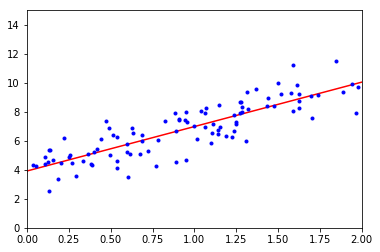

In [12]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0,2,0,15])
plt.show()

In [13]:
eta = 0.1
n_iterations = 1000
m = 100

theta = np.random.randn(2,1)
for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients
    
theta

array([[3.91748552],
       [3.06539348]])

In [14]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X **2 + X + 2 + np.random.rand(m,1)

In [15]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]

array([1.56386812])

In [16]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([2.55097829]), array([[1.01360891, 0.49108785]]))

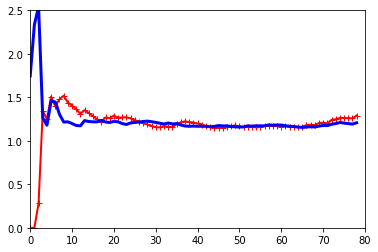

In [17]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train set")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="test set")
    plt.axis([0,80,0,2.5])

lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

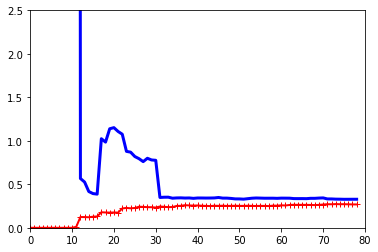

In [18]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
    ("lin_reg", LinearRegression())
])

plot_learning_curves(polynomial_regression, X, y)

In [19]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(X,y)
ridge_reg.predict([[1.5]])


array([[5.44858606]])

In [20]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=5, penalty="l2")
sgd_reg.fit(X, y)
sgd_reg.predict([[1.5]])

/Users/bumnyeong/ml/env/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
/Users/bumnyeong/ml/env/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([4.42044585])

In [21]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([5.40245993])